In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# **CrimeCast: Forecasting Crime Categories**
> Name: **Podey Om Prabhakar**
> Roll no. :** 21f2000968**

# Introduction: 
This notebook is regarding the MLP project, aimed to build an Machine learning Classification model

**Imports and Setup**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

In [3]:
#data Imports

traindata = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
testdata = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
sampledata = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")

In [4]:
#Data Imports testing
traindata.head(1)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.391,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes


In [5]:
testdata.head(1)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont


In [6]:
sampledata.head(2)

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN


# **EDA [Exploratory data analysis]**

In [7]:
#Aquring Shape of data
traindata.shape, testdata.shape

((20000, 22), (5000, 21))

> # Feature Understanding and Identifing feature Types

In [8]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

> # Understandings :
> > **Object type** features includes : 
        ['Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category']
       
> > **Numeric Type** features includes : 
        ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code']

> # Visualizing key statistics and Understanding features relationships

In [9]:
#Describing
traindata.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,20000.0,33.940704,2.126810,0.0000,34.0092,34.0587,34.165025,34.3281
Longitude,20000.0,-117.893072,7.377726,-118.6634,-118.4297,-118.3230,-118.274400,0.0000
Time_Occurred,20000.0,1352.380350,646.100291,1.0000,930.0000,1430.0000,1900.000000,2359.0000
Area_ID,20000.0,10.834250,6.033166,1.0000,6.0000,11.0000,16.000000,21.0000
Reporting_District_no,20000.0,1129.599200,603.330519,101.0000,632.0000,1162.0000,1622.000000,2197.0000
Part 1-2,20000.0,1.418150,0.493267,1.0000,1.0000,1.0000,2.000000,2.0000
Victim_Age,20000.0,30.135000,21.863645,-2.0000,12.0000,31.0000,46.000000,99.0000
Premise_Code,20000.0,297.176950,212.007298,101.0000,101.0000,203.0000,501.000000,969.0000
Weapon_Used_Code,7335.0,366.405044,120.485687,101.0000,312.0000,400.0000,400.000000,515.0000


> **Key Understandings** : 
> > * Latitude: The mean - approximately 33.94, standard deviation - 2.13. The values range - 0 to 34.33, but the minimum value of 0 might indicate an error or a placeholder value. --1.a
> > * Longitude:  The mean - approximately -117.89,  standard deviation - 7.38. The values range from 0 to -118.66, with the maximum value of 0 likely indicating an error or a placeholder value.
> > * Time_Occurred : Available in 24 Hrs Format. The interquartile range (IQR) spans from 930 (9:30 AM) to 1900 (7:00 PM), suggesting most incidents occur during daytime hours. --1.b
> > * Area_ID : Mean - 10.84 Approx.
> > * Reporting_District_no : Mean - 1129.60 Approx.
> > * Interesting Note : The Area_ID and Reporting_District_no haveing a similar trend of numbers in terms of their 	mean	std	min	25%	50%	75%	max ect. Indicating that they are likely closely related represent similar trend. --1.c
> > * Part 1-2	 : mean suggests that there are more incidents classified as Part 1 (serious crimes) than Part 2 (less serious crimes).
> > * Victime_Age : The min Value of -2 indicating an error or some kind of imputation we aren't aware off. --1.d

In [10]:
#Describing Object Types
traindata.describe(include='object').T

,count,unique,top,freq
Location,20000,12399,6TH,33
Cross_Street,3448,1495,BROADWAY,56
Date_Reported,20000,811,07/13/2020 12:00:00 AM,87
Date_Occurred,20000,366,01/01/2020 12:00:00 AM,137
Area_Name,20000,21,77th Street,1345
Modus_Operandi,17259,10489,0344,826
Victim_Sex,17376,4,M,8538
Victim_Descent,17376,17,H,6143
Premise_Description,19995,216,STREET,5033
Weapon_Description,7335,57,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3990


> **Key Understandings** : 
> > * Location : "6TH" being the most frequent, though it appears only a small number of times relative to the total count.
> > * Cross Street : Count: 3,448 (indicating  missing records) -- 1.e
> > * Date Occurred : The start of the year, "01/01/2020", has the highest number of occurrences, which might indicate a reporting anomaly or a specific event.  --1.f
> > * Modus Operandi (MO) : Count: 17,259 (indicating missing  records), "0344" being the most common
> > * Victim Sex :
Count: 17,376 (indicating missing  records), But out of entire population the Victim appears to be Male with a count of 8,538 times.  --1.g
> > * Premise Description : Count: 19,995 (almost complete data), with streets being the most common location for the Crime.
> > * Weapon Description :
    Count: 7,335 (indicating missing records) --1.h
> > * Status : The majority of incidents are under "Investigation Continued" status, indicating that many cases are ongoing.
> > * Crime Category :  Property crimes are the most prevalent category of incidents, comprising more than half of the total incidents.

> > * After this the Status and the Status_Description columns seems to be acting similar and may become the cause of data redundancy, therefore either one of the column may be dropped. 

In [11]:
#Initialised Columns to drop at the time of preprocessing.
drop_columns = []
drop_columns.append("Status_Description")

> #  Understanding Through Visualization

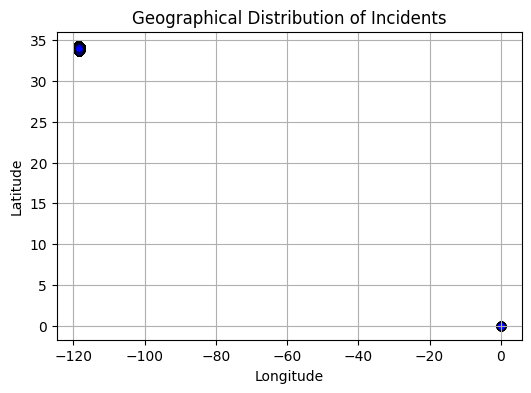

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(traindata['Longitude'], traindata['Latitude'], alpha=0.5, c='blue', edgecolors='k')
plt.title('Geographical Distribution of Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()



> > Top 10 Cross Streets

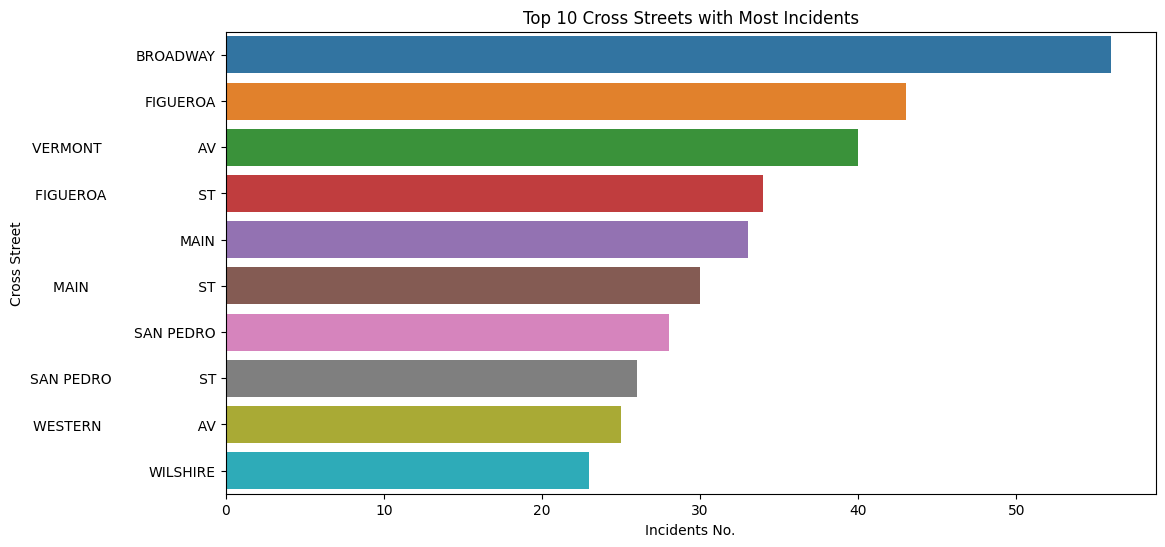

In [13]:
tops= traindata['Cross_Street'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=tops.values, y=tops.index)
plt.title('Top 10 Cross Streets with Most Incidents')
plt.xlabel('Incidents No.')
plt.ylabel('Cross Street')
plt.show()


> > Top 10 Areas

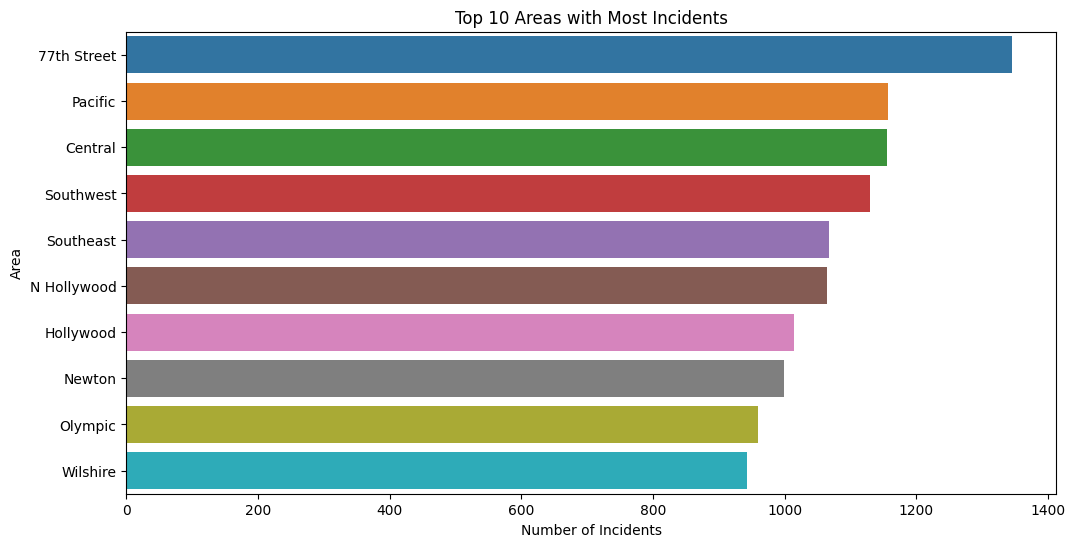

In [14]:
topar = traindata['Area_Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=topar.values, y=topar.index)
plt.title('Top 10 Areas with Most Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Area')
plt.show()


> > Victim_Sex distribution

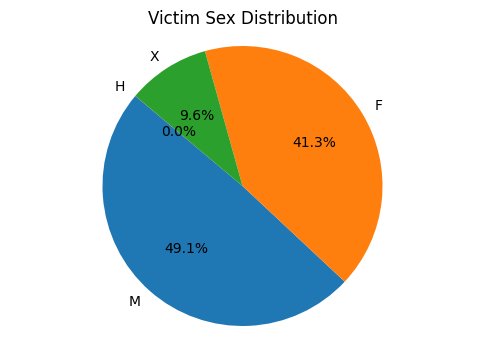

In [15]:
sc = traindata['Victim_Sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(sc, labels=sc.index, autopct='%1.1f%%', startangle=140)
plt.title('Victim Sex Distribution')
plt.axis('equal')
plt.show()

> > Key Insight : H with very less values can be adjusted in Preprocessing. -- 2.a
> > Male is the Heighest Crime Victim.

> > Sataus

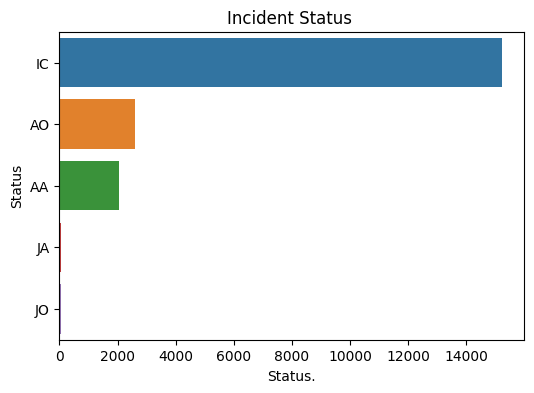

In [16]:
stc = traindata['Status'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=stc.values, y=stc.index)
plt.title('Incident Status ')
plt.xlabel('Incident No.')
plt.xlabel('Status.')
plt.show()

> Inevstigate the **Target Variable**

In [17]:
Target = traindata.Crime_Category

In [18]:
Target.value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

In [19]:
#In terms of percentages:
Target.value_counts()/len(Target)*100

Crime_Category
Property Crimes                  58.330
Violent Crimes                   23.835
Crimes against Public Order       9.040
Fraud and White-Collar Crimes     6.775
Crimes against Persons            1.125
Other Crimes                      0.895
Name: count, dtype: float64

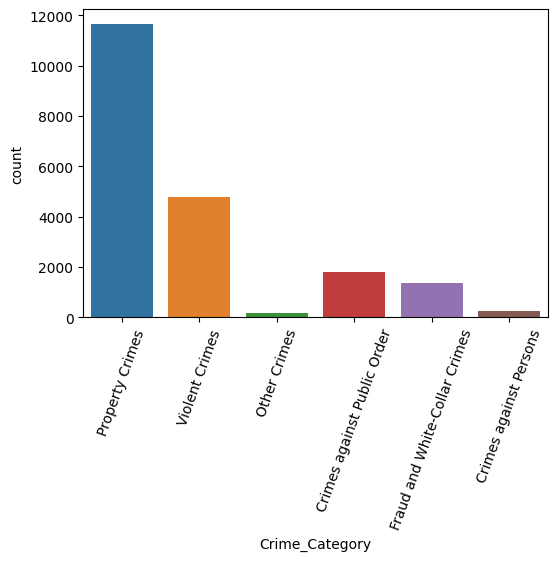

In [20]:
#Lets Visualize for better interpretation:
plt.figure(figsize=(6,4))
sns.countplot(data = traindata, x='Crime_Category')
plt.xticks(rotation = 70)
plt.show()

> > **Clearly we can interpret that the most of the crime are due to property disputes and there are very less crime happened againts the persons.**

> > Lets plot the proff of Males were the most who where top victims and analyze their category of crime.

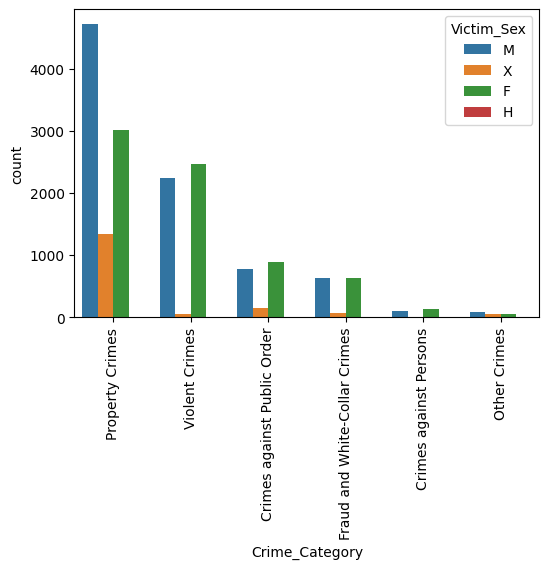

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Crime_Category',hue='Victim_Sex',data=traindata, order=traindata.Crime_Category.value_counts().index)
plt.xticks(rotation=90)
plt.show()

> > From Previous (2.a) and current visualization we can coclude the category of H is hardly contribututing to the data. We have noted it and can be adjusted in the preprocessing. -- 2.b 

> Lets Now Visualize **Victim_age** and **Victim_descent**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


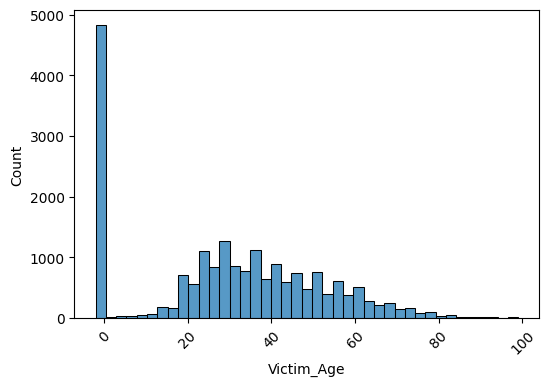

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(x='Victim_Age',data=traindata)
plt.xticks(rotation=45)
plt.show()

> > Clearly 0 is having most values (1.d), should be handled in preprocessing. --2.c

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


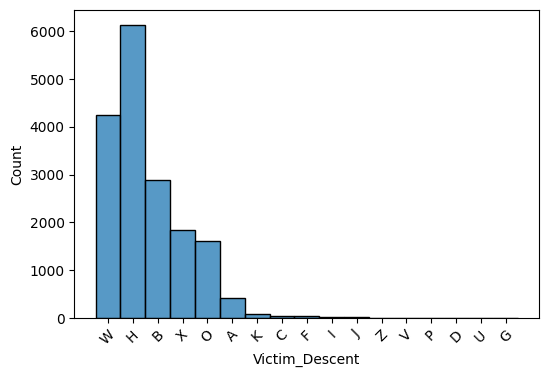

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(x='Victim_Descent',data=traindata)
plt.xticks(rotation=45)
plt.show()

> > Need further investigation and adjustments for K to G category. --2.d

> > One more interesting analysis could be done with the age of victim and the type of crime associated but as we know the age of victim has been misplaced or imputed with 0 as its max counts of age (2.c) so therefore it will needed to be preprocessed in order for the visualizations. - 3.a

# **Preprocessing**

> Analyzing and Handling **Missing Values**

In [24]:
traindata.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

> > Lets see in terms of %

In [25]:
traindata.isna().sum()/len(traindata)*100

Location                  0.000
Cross_Street             82.760
Latitude                  0.000
Longitude                 0.000
Date_Reported             0.000
Date_Occurred             0.000
Time_Occurred             0.000
Area_ID                   0.000
Area_Name                 0.000
Reporting_District_no     0.000
Part 1-2                  0.000
Modus_Operandi           13.705
Victim_Age                0.000
Victim_Sex               13.120
Victim_Descent           13.120
Premise_Code              0.000
Premise_Description       0.025
Weapon_Used_Code         63.325
Weapon_Description       63.325
Status                    0.000
Status_Description        0.000
Crime_Category            0.000
dtype: float64

> > Clearly ( as a standard pracrtice and studied ) we shall remove the features with more than 50% of the missing values as they will not contribute much to the model precisions even after imputing it will be going to be synthetic and not actuall.

> >  Features > 50% missing data : ['Cross_Street','Weapon_Used_Code','Weapon_Description']

In [26]:
missing = ['Cross_Street','Weapon_Used_Code','Weapon_Description']
for i in missing:
    drop_columns.append(i)

> from previous analysis (1.d) we found out Victim_age is having some 0 and negetive values, lets impute them with the mean of the age.

In [27]:
traindata.Victim_Age.value_counts()

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

In [28]:
# traindata.Victim_Age.replace(0,traindata.Victim_Age.mean(),inplace=True)
# traindata.Victim_Age.replace(-2,traindata.Victim_Age.mean(),inplace=True)
# traindata.Victim_Age.replace(-1,traindata.Victim_Age.mean(),inplace=True)

In [29]:
si_0 = SimpleImputer(strategy='mean',missing_values=0)
si_neg = SimpleImputer(strategy='mean',missing_values=-2)
si_neg1 = SimpleImputer(strategy='mean',missing_values=-1)

si_0.fit(traindata[['Victim_Age']])
traindata[['Victim_Age']] = si_0.transform(traindata[['Victim_Age']])

si_neg.fit(traindata[['Victim_Age']])
traindata[['Victim_Age']] = si_neg.transform(traindata[['Victim_Age']])

si_neg1.fit(traindata[['Victim_Age']])
traindata[['Victim_Age']] = si_neg1.transform(traindata[['Victim_Age']])

> Performing the same preprocessing(Imputations) parallely over the **test data**.

In [30]:
testdata.Victim_Age.unique()

array([28., 26., 62.,  0., 37., 58., 21., 19., 31., 35., 25., 27., 20.,
       67., 36., 15., 24., 53., 30., 38., 71., 34., 16., 33., 32., 77.,
       39., 52., 23., 61., 50., 63., 45., 22., 73., 40., 60., 55., 29.,
       41., 51., 46., -2., 44., 99., 81., 43., 57., 12., 79., 93., 65.,
       54., 59., 83., 64., 49., 56., 47., 42., 70., 78., 68., 80., 18.,
       96., 48., 74., 76., 11., 14., 66., 72.,  7., 10.,  6., 69., 17.,
       82.,  5.,  9.,  4., 85., 75., 88.,  8., 86., 13.,  3.,  2., -1.,
       84., 90., 91.])

In [31]:
# testdata.Victim_Age.replace(0,traindata.Victim_Age.mean(),inplace=True)
# testdata.Victim_Age.replace(-2,traindata.Victim_Age.mean(),inplace=True)
# testdata.Victim_Age.replace(-1,traindata.Victim_Age.mean(),inplace=True)

In [32]:
testdata[['Victim_Age']] = si_0.transform(testdata[['Victim_Age']])
testdata[['Victim_Age']] = si_neg.transform(testdata[['Victim_Age']])
testdata[['Victim_Age']] = si_neg1.transform(testdata[['Victim_Age']])

In [33]:
testdata.Victim_Age.value_counts()

Victim_Age
39.724492    1188
30.000000     143
28.000000     113
27.000000     110
34.000000     105
             ... 
3.000000        1
4.000000        1
5.000000        1
81.000000       1
91.000000       1
Name: count, Length: 94, dtype: int64

In [34]:
traindata.Victim_Age.value_counts()

Victim_Age
39.724492    4828
30.000000     448
31.000000     446
26.000000     442
29.000000     425
             ... 
98.000000       2
39.728665       2
92.000000       2
96.000000       2
94.000000       2
Name: count, Length: 100, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


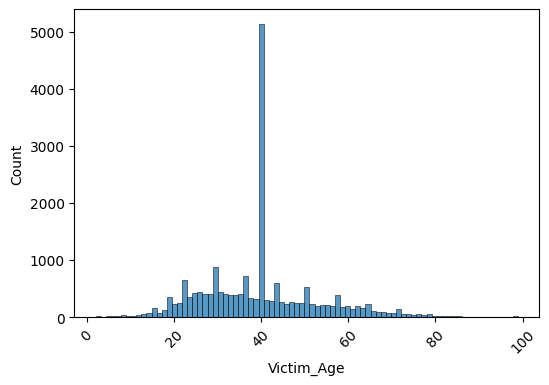

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(x='Victim_Age',data=traindata)
plt.xticks(rotation=45)
plt.show()

> Clearly from (2.c) now the age is justified.

> Lets bow impute or adjust the unnesesary classes which are not contributing soo much.
> > From (2.a,2.b) we observed that the category of H in the Victim_Sex is very less, lets analyze it.

In [36]:
traindata.Victim_Sex.value_counts()

Victim_Sex
M    8538
F    7176
X    1660
H       2
Name: count, dtype: int64

> > Lets just swap H with X ( The 'X' category might already be used to represent an unknown, undefined, or non-binary sex/gender. If 'H' is similarly an undefined or unknown value, consolidating it into 'X' maintains consistency in how undefined or unknown values are represented. ) 

> > Same goes to Test Data also.

In [37]:
traindata.Victim_Sex.replace('H','X',inplace=True)

/tmp/ipykernel_18/4114491906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindata.Victim_Sex.replace('H','X',inplace=True)


In [38]:
traindata.Victim_Sex.value_counts()

Victim_Sex
M    8538
F    7176
X    1662
Name: count, dtype: int64

In [39]:
testdata.Victim_Sex.replace('H','X',inplace=True)
testdata.Victim_Sex.value_counts()

/tmp/ipykernel_18/567882156.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testdata.Victim_Sex.replace('H','X',inplace=True)


Victim_Sex
M    2121
F    1840
X     396
Name: count, dtype: int64

> Now from 2.d we have got:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


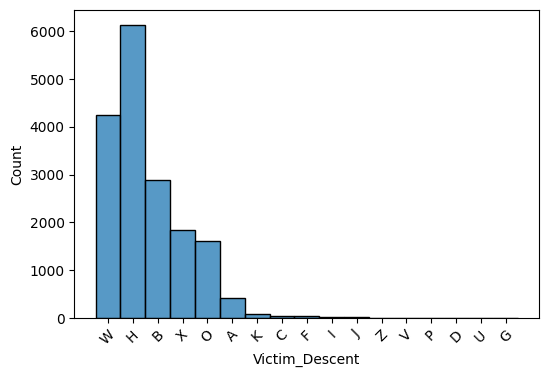

In [40]:
plt.figure(figsize=(6,4))
sns.histplot(x='Victim_Descent',data=traindata)
plt.xticks(rotation=45)
plt.show()

> > As discussed in 2.d lets grop the categories from K to G to a single category ( others )

In [41]:
desc_per = traindata.Victim_Descent.value_counts()/len(traindata)*100
traindata.Victim_Descent.value_counts()/len(traindata)*100
#Clubbing below 0 percent....

Victim_Descent
H    30.715
W    21.225
B    14.405
X     9.245
O     8.015
A     2.135
K     0.415
C     0.255
F     0.240
J     0.080
I     0.055
V     0.040
P     0.020
Z     0.015
U     0.010
D     0.005
G     0.005
Name: count, dtype: float64

In [42]:
categories_to_club = desc_per[desc_per < 1].index.tolist()

In [43]:
categories_to_club # K-G

['K', 'C', 'F', 'J', 'I', 'V', 'P', 'Z', 'U', 'D', 'G']

In [44]:
traindata.Victim_Descent.replace(categories_to_club, 'Others', inplace=True)

/tmp/ipykernel_18/419879585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindata.Victim_Descent.replace(categories_to_club, 'Others', inplace=True)


In [45]:
traindata.Victim_Descent.value_counts()

Victim_Descent
H         6143
W         4245
B         2881
X         1849
O         1603
A          427
Others     228
Name: count, dtype: int64

In [46]:
#test Data :
testdata.Victim_Descent.replace(categories_to_club, 'Others', inplace=True)

/tmp/ipykernel_18/1526629695.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testdata.Victim_Descent.replace(categories_to_club, 'Others', inplace=True)


> From 3.a we can now see the victims of different age getting involved in crimes ( **ANALYSIS** )

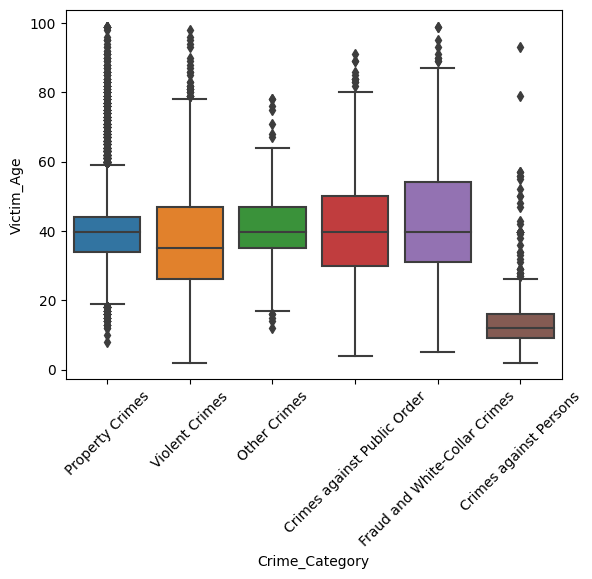

In [47]:
sns.boxplot(x='Crime_Category',y='Victim_Age',data=traindata)
plt.xticks(rotation=45)
plt.show()

> >  Analysis and Interpretations: 
> > * Median Age:
        The median age (the line inside each box) varies across different crime categories. For instance:
        Property Crimes: Median age is around 35.
        Violent Crimes: Median age is slightly below 35.
        Other Crimes: Median age is around 35.
        Crimes against Public Order: Median age is around 40.
        Fraud and White-Collar Crimes: Median age is around 45.
        Crimes against Persons: Median age is around 20.
         > > * The Crimes against Persons category is targeting mostly Childrens and Miniors about 18 years of age. .
         > > * Violent Crimes:The median age is slightly lower compared to property crimes, and there is a wide range of ages, suggesting that victims of violent crimes can be of various ages. 
                > > *Fraud and White-Collar Crimes: Highest median age, suggesting that older individuals are more often victims in this category, possibly due to factors like financial stability or vulnerability to fraud.


> Lets see the Corelations to prove out our small interpretations.

In [48]:
num_features = traindata.select_dtypes(include=[np.number,'float64','int64'])

In [49]:
num_features.columns

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')

<Axes: >

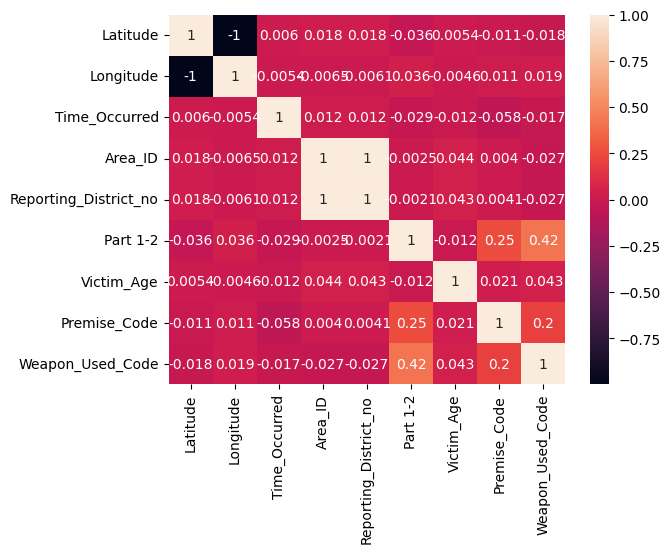

In [50]:
sns.heatmap(num_features.corr(),annot=True)

> > Analysis :
> > * As we stated the lattitute and longituite are very strongly negetively correlated.
> > * Refereing to our prior analysis (1.c) as the 25%, 50% etc. od Area_ID and the Reporting_District_NO. were having a common trend henceforth reflected by having Strong possitive Correlation of [1].
> > * Some other correlations about 0.5 and around can be seen in Part_1_2 and Weapon_Used_Codes and so on.

In [51]:
traindata.columns #For reference purpose.

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

> Lets now see the interelation between the Area_ID and Area_Name: 

In [52]:
traindata.Area_ID.value_counts()

Area_ID
12.0    1345
14.0    1157
1.0     1156
3.0     1130
18.0    1067
15.0    1065
6.0     1014
13.0     999
20.0     960
7.0      943
2.0      931
8.0      910
9.0      902
5.0      872
19.0     870
11.0     839
21.0     792
10.0     790
17.0     769
4.0      755
16.0     734
Name: count, dtype: int64

In [53]:
traindata.Area_Name.value_counts()

Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         910
Van Nuys        902
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     790
Devonshire      769
Hollenbeck      755
Foothill        734
Name: count, dtype: int64

> > Based on the value_counts() for Area_ID and Area_Name, the Area_Name column essentially provides a textual representation of what is already encoded numerically in the Area_ID column. Lets drop the coulmn Area_Name

In [54]:
drop_columns.append("Area_Name")

> Lets see some **similar interpretations.**

In [55]:
traindata.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,39.736813,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,13.730230,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,30.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,39.724492,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


> > Redundancy of Reporting_District_no with Area_ID: If Reporting_District_no is highly correlated with Area_ID (which might be the case if districts align with areas as Distric(area)), it may provide redundant information. If the Area_ID column adequately captures the geographical or jurisdictional aspects we need, Reporting_District_no may not add new value.

In [56]:
drop_columns.append('Reporting_District_no')

> > Similarly lets see Latitude and Longitue features.
> > Redundancy with Location + Area_ID: As the data already captured location information and along with Area_ID, then latitude and longitude might be redundant also it consists with some 0 values. Removing them can simplify our model without losing valuable information.

In [57]:
drop_columns.append("Latitude")
drop_columns.append("Longitude")

> > From Various above analysis we can interpret that even the  Premise_Code and the Premise_Description are Redudant, ( Premise_Description is providing Description just about the Premise_Code (which is inded needed for the current situation.))

In [58]:
drop_columns.append("Premise_Description")

> > Now Lets see and convert the date data appropriately to capture out some insights and handle the data efficiently. ( Convert with pd.datetime)

In [59]:
traindata.Date_Reported = pd.to_datetime(traindata.Date_Reported)

/tmp/ipykernel_18/2624425847.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traindata.Date_Reported = pd.to_datetime(traindata.Date_Reported)


> > > * Lets now Break the date in terms of year, months, and days to deep dive. 

In [60]:
traindata['Year_Reported'] = traindata['Date_Reported'].dt.year
traindata['Month_Reported'] = traindata['Date_Reported'].dt.month
traindata['Day_Reported'] = traindata['Date_Reported'].dt.day

> > > * Lets now see the Yearly Distribution. 

> 

In [61]:
traindata.Year_Reported.value_counts()

Year_Reported
2020    19177
2021      532
2022      176
2023      108
2024        7
Name: count, dtype: int64

In [62]:
#Cheking in terms of %
traindata.Year_Reported.value_counts()/len(traindata)*100

Year_Reported
2020    95.885
2021     2.660
2022     0.880
2023     0.540
2024     0.035
Name: count, dtype: float64

> > > * Data Imbalance: The vast majority of records are from the year 2020, with very few records from subsequent years. This imbalance could skew the model's learning and make it biased towards the patterns present in 2020 data, potentially reducing the generalizability and robustness of the model.
> > > * This might cause Overfitting.(4.a)

> > > * Similary for the Months:

In [63]:
traindata.Month_Reported.value_counts()

Month_Reported
1     1824
5     1754
2     1726
6     1725
7     1690
10    1681
9     1663
8     1634
3     1625
12    1587
11    1549
4     1542
Name: count, dtype: int64

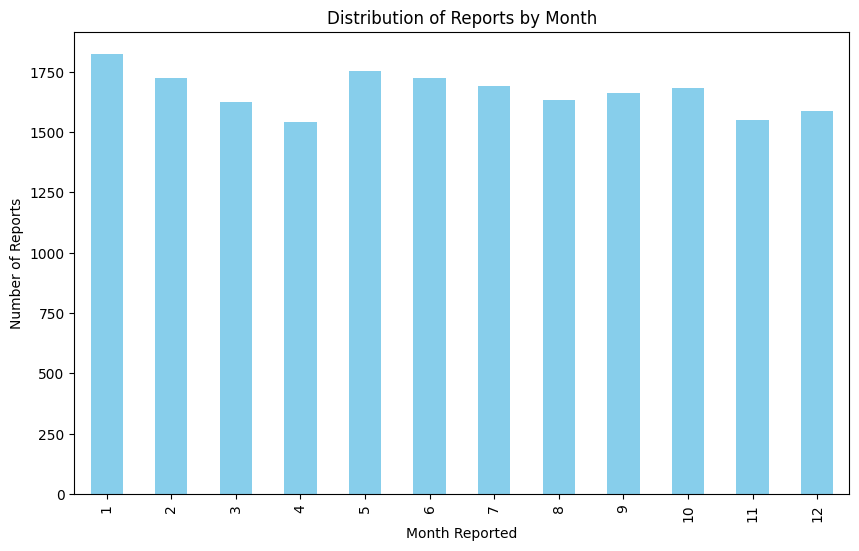

In [64]:
mnths = traindata['Month_Reported'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
mnths.plot(kind='bar', color='skyblue')
plt.title('Distribution of Reports by Month')
plt.xlabel('Month Reported')
plt.ylabel('Number of Reports')
plt.show()

> > > * The data is fairly evenly distributed across all months, indicating no significant bias towards any particular month. This balanced distribution suggests that the month of reporting might not skew the model unduly. With refence of (4.a)

In [65]:
traindata.Day_Reported.value_counts()

Day_Reported
28    721
4     710
21    704
16    698
17    695
5     688
18    682
24    669
23    668
10    660
22    660
6     658
1     656
25    654
13    653
11    646
26    643
14    639
30    639
9     638
2     637
20    637
3     636
8     631
7     630
27    629
12    621
29    616
15    616
19    601
31    365
Name: count, dtype: int64

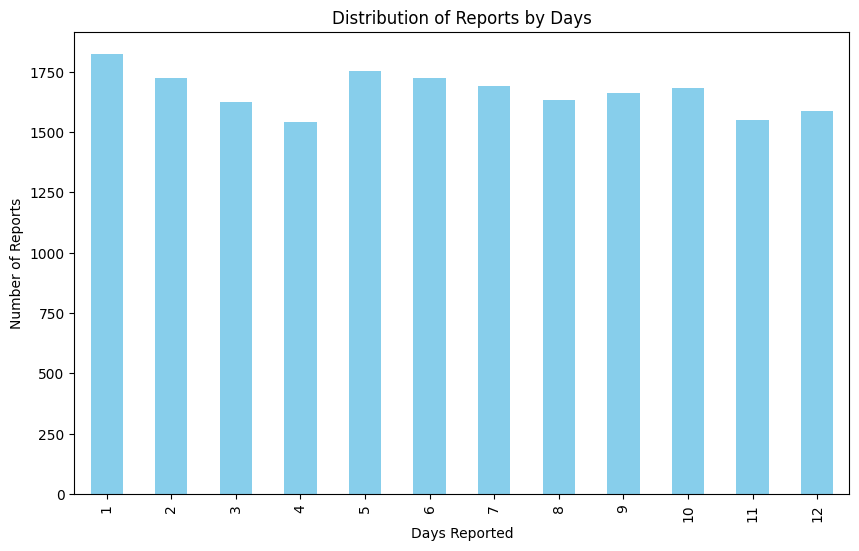

In [66]:
dys = traindata['Day_Reported'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
mnths.plot(kind='bar', color='skyblue')
plt.title('Distribution of Reports by Days')
plt.xlabel('Days Reported')
plt.ylabel('Number of Reports')
plt.show()

> > > * Fairly follows the similar Distribution as of Months.
> > > * Therefore due to (4.a) even though this is fairly distributed we can drop them.

In [67]:
traindata['Date_Occurred'] = pd.to_datetime(traindata['Date_Occurred'])

/tmp/ipykernel_18/801610842.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traindata['Date_Occurred'] = pd.to_datetime(traindata['Date_Occurred'])


In [68]:
traindata['Year_Occurred'] = traindata['Date_Occurred'].dt.year
traindata['Month_Occurred'] = traindata['Date_Occurred'].dt.month
traindata['Day_Occurred'] = traindata['Date_Occurred'].dt.day

In [69]:
traindata.Year_Occurred.value_counts()

Year_Occurred
2020    20000
Name: count, dtype: int64

> > > * Clearly Bais towards a specific Year.

> > > * Lets drop the least contributing or bais features again.

In [70]:
date_dropers_created = ['Year_Occurred','Month_Occurred','Day_Occurred','Year_Reported','Month_Reported','Day_Reported']
date_dropss = ['Date_Occurred','Date_Reported','Time_Occurred']
#seperated lists as test data doesn't contain the newly added columns or variables.
for i in date_dropss:
    drop_columns.append(i)
    

> Droping from actuall Data.

In [71]:
traindata.drop(columns=drop_columns,inplace=True)

In [72]:
traindata.drop(columns=date_dropers_created,inplace=True)

> Similar Droppings for the test data.

In [73]:
testdata.drop(columns=drop_columns,inplace=True)

> Sanity Check:

In [74]:
traindata.shape, testdata.shape

((20000, 10), (5000, 9))

> ## X Y splittings

In [75]:
X = traindata.drop(columns = ['Crime_Category'])
Y = traindata['Crime_Category']

> * Leftover Null values Imputations

In [76]:
X.isna().sum()

Location             0
Area_ID              0
Part 1-2             0
Modus_Operandi    2741
Victim_Age           0
Victim_Sex        2624
Victim_Descent    2624
Premise_Code         0
Status               0
dtype: int64

In [77]:
object_cols = X.select_dtypes(include=['object']).columns

In [78]:
missing_cols = [col for col in object_cols if col not in ['Location','Status']]

In [79]:
missing_cols 

['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']

> ColumnTransformer : Impute the missing data

In [80]:
missing_cols  = ['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']

In [81]:
imputer = SimpleImputer(strategy='most_frequent')

In [82]:
for col in missing_cols:
    X[[col]] = imputer.fit_transform(X[[col]])

In [83]:
X.isna().sum()

Location          0
Area_ID           0
Part 1-2          0
Modus_Operandi    0
Victim_Age        0
Victim_Sex        0
Victim_Descent    0
Premise_Code      0
Status            0
dtype: int64

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        20000 non-null  object 
 1   Area_ID         20000 non-null  float64
 2   Part 1-2        20000 non-null  float64
 3   Modus_Operandi  20000 non-null  object 
 4   Victim_Age      20000 non-null  float64
 5   Victim_Sex      20000 non-null  object 
 6   Victim_Descent  20000 non-null  object 
 7   Premise_Code    20000 non-null  float64
 8   Status          20000 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


In [85]:
X.head()

,Location,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status
0,4500 CARPENTER AV,15.0,1.0,0385,75.000000,M,W,101.0,IC
1,45TH ST,13.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.000000,M,H,216.0,IC
2,600 E MARTIN LUTHER KING JR BL,13.0,2.0,0329 1202,67.000000,M,B,501.0,IC
3,14900 ORO GRANDE ST,19.0,1.0,0329 1300,61.000000,M,H,101.0,IC
4,7100 S VERMONT AV,12.0,1.0,0416 0945 1822 0400 0417 0344,39.724492,X,X,401.0,IC


> > Performing the same over Test data.

In [86]:
for col in missing_cols:
    testdata[[col]] = imputer.fit_transform(testdata[[col]])

In [87]:
testdata.isna().sum()

Location          0
Area_ID           0
Part 1-2          0
Modus_Operandi    0
Victim_Age        0
Victim_Sex        0
Victim_Descent    0
Premise_Code      0
Status            0
dtype: int64

> Train and Validation Data splitting. --**(7.a)**

In [88]:
xtrain,xval, ytrain, yval, = train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=43) 

In [89]:
xtrain.shape, ytrain.shape, xval.shape, yval.shape

((16000, 9), (16000,), (4000, 9), (4000,))

In [90]:
#columns extracted from orignal training dataset (Helpful for later pd.DataFrame Creations.)
cols=['Location', 'Area_ID', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Status']

In [91]:
numeric_cols = X.select_dtypes(include=[np.number,'float64','int64']).columns
categorical_cols = X.select_dtypes(include='object').columns
categorical_cols.rename('Modus_Operandi')
text_cols = ['Modus_Operandi']

> > The numeric features, categorical features and the simple text features can be differentiated in order to perform the following **transformations and scalings**.
> > > * The numeric features can be scaled in order to decrese the model complexity and increse the model efficiency.
> > > * The catrgorical features can be encoded with the Onehotenconder [ Categorical (text) ---> numeric representation ]
> > > * The rest texual feature can be converted by the TfidfVectorizer

In [92]:
numeric_cols=['Area_ID', 'Part 1-2', 'Victim_Age', 'Premise_Code'] 
categorical_cols=['Location', 'Victim_Sex', 'Victim_Descent', 'Status'] 
text_cols=['Modus_Operandi']

In [93]:
numeric_pipe = Pipeline([('Scalar',StandardScaler())])
categorical_pipe = Pipeline([('Encoder',OneHotEncoder(handle_unknown='ignore'))])
numric_cat = ColumnTransformer([('numeric',numeric_pipe,numeric_cols),('categorical',categorical_pipe,categorical_cols)])


> > Numeric and Categorical transformation Pipeline. - (5.a)

In [94]:
numric_cat

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('Scalar', StandardScaler())]),
                                 ['Area_ID', 'Part 1-2', 'Victim_Age',
                                  'Premise_Code']),
                                ('categorical',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Location', 'Victim_Sex', 'Victim_Descent',
                                  'Status'])])

> > Texual transformation Pipeline. -- (5.b)

In [95]:
text_pipe = Pipeline([('Tfidf',TfidfVectorizer())])
text_pipe

Pipeline(steps=[('Tfidf', TfidfVectorizer())])

In [96]:
#Fittings, scalings and Transformations
xtrain_nc=numric_cat.fit_transform(xtrain)
xval_nc=numric_cat.transform(xval)
testdata_nc=numric_cat.transform(testdata)

In [97]:
xtrain_t=text_pipe.fit_transform(xtrain['Modus_Operandi'])
xval_t=text_pipe.transform(xval['Modus_Operandi'])
testdata_t=text_pipe.transform(testdata['Modus_Operandi'])

> > Stacking of Pipe one (5.a) with Pipe two (5.b). 

In [98]:
xtrain_sab = pd.DataFrame(np.hstack((xtrain_nc.toarray(),xtrain_t.toarray())))
xval_sab = pd.DataFrame(np.hstack((xval_nc.toarray(),xval_t.toarray())))
testdata_sab = pd.DataFrame(np.hstack((testdata_nc.toarray(),testdata_t.toarray())))

In [99]:
xtrain_sab.shape, xval_sab.shape, testdata_sab.shape

((16000, 10964), (4000, 10964), (5000, 10964))

# Feature Engineering
> Feature Engineering enhances the data quality and transforms the data into features that better represent the underlying problem.
> > * The main context of Feature Engineering in our model is to :
> > * Dealing with Data Quality and Dimensionality Reduction henceforth enhancing the model performance. 

> Lasso Regression: Lasso (Least Absolute Shrinkage and Selection Operator) performs both regularization and feature selection by shrinking the coefficients of less important features to zero. It is henceforth useful for selecting a small number of features that are strongly associated with the target variable. 
> > However, Lasso might miss some features that are weakly correlated but still important when considered together with other features.

In [100]:
#The Target variable needed to be converted to numeric as far the process demands.
#Using LabelEncoder for the same. [a,b,c--->0,1,2]
le = LabelEncoder()
ytrain_encoded = le.fit_transform(ytrain)
yval_encoded = le.transform(yval)

In [101]:
lasso = Lasso(alpha=0.01) #  A smaller alpha (e.g., 0.01) will result in less regularization, possibly retaining more features, while a larger alpha will increase regularization, leading to more coefficients being shrunk to zero.
lasso.fit(xtrain_sab, ytrain_encoded)
selected_features = np.where(lasso.coef_ != 0)[0]  #imp features
# Using the indices of the selected features, this code subsets the original datasets (xtrain_sab, xval_sab, and testdata_sab) to keep only the features that Lasso has deemed important.
xtrain_selected_lasso = xtrain_sab.iloc[:, selected_features]
xval_selected_lasso = xval_sab.iloc[:, selected_features]
testdata_selected_lasso = testdata_sab.iloc[:, selected_features]

In [102]:
xtrain_selected_lasso.shape

(16000, 17)

> > The dataset has been significatly reduced.

> > While Lasso regression initially helped reduce the dimensionality of our dataset, the resulting model did not achieve the desired level of accuracy. To further refine our feature selection process and improve model performance, we decided to apply SelectKBest to the original dataset.

> SelectKBest is used to identify the top K features based on statistical tests (such as ANOVA, chi-square) that measure the relationship between each feature and the target variable.

In [103]:
selector = SelectKBest(score_func=f_classif, k=4900)

In [104]:
xtrain_selected = selector.fit_transform(xtrain_sab, ytrain)
xval_selected = selector.transform(xval_sab)
testdata_selected = selector.transform(testdata_sab)

In [105]:
xtrain_selected.shape, xval_selected.shape, testdata_selected.shape

((16000, 4900), (4000, 4900), (5000, 4900))

> Clubbing both together.
> > In our feature selection process, we have employed both Lasso regression and SelectKBest. The decision to use these two methods in conjunction is based on their complementary strengths and the goal of enhancing our model’s performance.

In [106]:
xtrain_combined = np.hstack((xtrain_selected, xtrain_selected_lasso))
xval_combined = np.hstack((xval_selected, xval_selected_lasso))
testdata_combined = np.hstack((testdata_selected, testdata_selected_lasso))

In [107]:
xtrain_combined.shape, xval_combined.shape, testdata_combined.shape

((16000, 4917), (4000, 4917), (5000, 4917))

> ## Compare the Dimensions.

In [108]:
num_features_before = xtrain_sab.shape[1] 
num_features_after = xtrain_combined.shape[1] 
labels = ['Before Feature Engineering', 'After Feature Engineering']
feature_counts = [num_features_before, num_features_after]

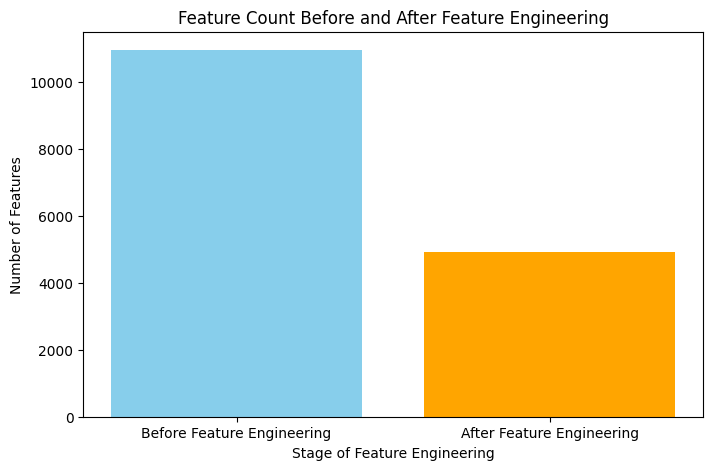

In [109]:
plt.figure(figsize=(8, 5))
plt.bar(labels, feature_counts, color=['skyblue', 'orange'])
plt.xlabel('Stage of Feature Engineering')
plt.ylabel('Number of Features')
plt.title('Feature Count Before and After Feature Engineering')
plt.show()

# Model Tranings and evaluations:
> * Model tranings done without Hyperparameters tunnings. 
> > * Lets try with Baseline model Logistic Regression:

In [110]:
model_log = LogisticRegression(max_iter=2000, random_state=42)
model_log.fit(xtrain_combined, ytrain_encoded)

LogisticRegression(max_iter=2000, random_state=42)

In [111]:
log_pred = model_log.predict(xval_combined)
log_pred = le.inverse_transform(log_pred)
yval_decoded = le.inverse_transform(yval_encoded)
ytrain_decoded = le.inverse_transform(ytrain_encoded)
log_accuracy = accuracy_score(yval_decoded, log_pred)
log_accuracy

0.93275

> > Lets see the classiffication report and the confusion matrix.

In [112]:
print("Classification Report:")
print(classification_report(yval_decoded, log_pred))

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.71      0.53      0.61        45
  Crimes against Public Order       0.84      0.77      0.80       362
Fraud and White-Collar Crimes       0.89      0.95      0.92       271
                 Other Crimes       0.80      0.11      0.20        36
              Property Crimes       0.97      0.97      0.97      2333
               Violent Crimes       0.89      0.94      0.91       953

                     accuracy                           0.93      4000
                    macro avg       0.85      0.71      0.74      4000
                 weighted avg       0.93      0.93      0.93      4000



> > * #### Insights:
> > *  The model accuracy indicates that the model performs well overall.
> > * These are the averages of the metrics across all classes, treating each class equally. The macro average indicates overall model performance, showing a good balance but with some classes underperforming.
> > * These averages are weighted by the number of samples in each class, reflecting the model’s performance across all classes considering their support. This high performance in weighted averages indicates that the model performs well across the majority of the classes, especially considering the imbalance in support.
>  * Pricision : It measures how many of the predicted positives are actually positive. High precision means fewer false positives.
>  * Recall : It measures how many of the actual positives were correctly identified. High recall means fewer false negatives.
>  * F-1 Score : It combines precision and recall into a single metric, useful when you need to balance both false positives and false negatives.
>  * Support : It shows how many samples of each class were present in the validation set.
>  * Weighted Average : It considers the support of each class, providing a performance measure that accounts for class imbalance.

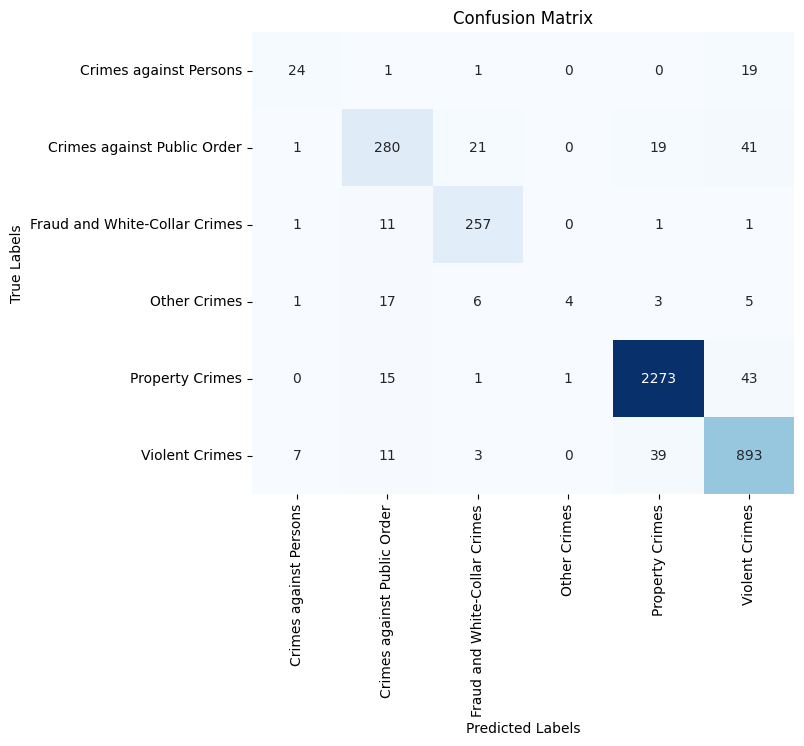

In [113]:
conf_matrix = confusion_matrix(yval_decoded, log_pred)
plt.figure(figsize=(7, 6))
class_names=le.classes_
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=class_names, yticklabels=class_names)
#'d' indicates that the numbers should be formatted as decimal integers.
#'cbar' this parameter disables the color bar (legend) that indicates the scale of values. Setting it to True would display the color bar next to the heatmap, showing the range of values represented by different colors.
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> > Provides the classes and their predictions.

> Lets try it out with Descision Tress
> > Decision Trees are a type of supervised learning algorithm used for classification and regression tasks.

In [114]:
model_dtree = DecisionTreeClassifier(random_state=42)
model_dtree.fit(xtrain_combined,ytrain_decoded)

DecisionTreeClassifier(random_state=42)

In [115]:
dtree_pred = model_dtree.predict(xval_combined)
dtree_accuracy = accuracy_score(yval_decoded, dtree_pred)
dtree_accuracy

0.92825

> Lets see the classiffication report and the confusion matrix.

In [116]:
print("Classification Report:")
print(classification_report(yval_decoded, dtree_pred))

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.63      0.58      0.60        45
  Crimes against Public Order       0.79      0.76      0.78       362
Fraud and White-Collar Crimes       0.88      0.92      0.90       271
                 Other Crimes       0.39      0.25      0.31        36
              Property Crimes       0.97      0.98      0.98      2333
               Violent Crimes       0.90      0.91      0.91       953

                     accuracy                           0.93      4000
                    macro avg       0.76      0.73      0.74      4000
                 weighted avg       0.93      0.93      0.93      4000



> > * **Insights** 
> > > * The model performed and achieved a high accuracy over the validation set, indicating that it correctly classified a majority of the cases across all crime categories.
> > > * The weighted average precision, recall, and F1-score are also high, showing that the model maintains balanced performance across classes.
> > > * The model struggles with detecting "Other Crimes," with a quite low precision and similarly a low recall. 
> > > * The varying support highlights potential class imbalance, which might be influencing the model's performance. For instance, "Property Crimes" have a much larger number of examples compared to "Other Crimes", which could lead the model to perform better on the former.

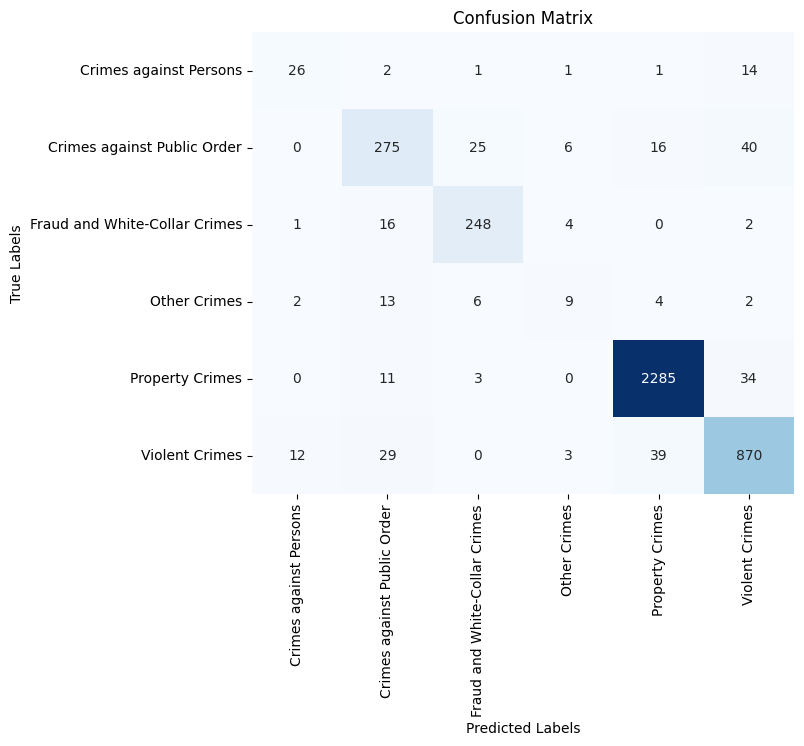

In [117]:
conf_matrix = confusion_matrix(yval_decoded, dtree_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=class_names, yticklabels=class_names)
#'d' indicates that the numbers should be formatted as decimal integers.
#'cbar' this parameter disables the color bar (legend) that indicates the scale of values. Setting it to True would display the color bar next to the heatmap, showing the range of values represented by different colors.
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> > The above insights can be clearly seen here.

> > Lets now try to balance out the classimblance and check with parameter class_weight = 'balanced'.
> > This will automatically adjust the weights inversely proportional to class frequencies.

In [118]:
model_dtree_im = DecisionTreeClassifier(random_state=42, class_weight = 'balanced') 
model_dtree_im.fit(xtrain_combined,ytrain_decoded)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [119]:
dtree_pred_im = model_dtree.predict(xval_combined)
dtree_accuracy_im = accuracy_score(yval_decoded, dtree_pred)
dtree_accuracy_im

0.92825

In [120]:
print("Classification Report:")
print(classification_report(yval_decoded, dtree_pred_im))

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.63      0.58      0.60        45
  Crimes against Public Order       0.79      0.76      0.78       362
Fraud and White-Collar Crimes       0.88      0.92      0.90       271
                 Other Crimes       0.39      0.25      0.31        36
              Property Crimes       0.97      0.98      0.98      2333
               Violent Crimes       0.90      0.91      0.91       953

                     accuracy                           0.93      4000
                    macro avg       0.76      0.73      0.74      4000
                 weighted avg       0.93      0.93      0.93      4000



> > This technique have not performed quite well, as compared to the previous one,so let us now try other model.

> Lets try with Random Forest
> > * Random Forest is an ensemble learning method used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [121]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(xtrain_combined, ytrain_decoded)

RandomForestClassifier(random_state=42)

In [122]:
rf_pred = model_rf.predict(xval_combined)
rf_accuracy = accuracy_score(yval_decoded,rf_pred)
rf_accuracy

0.9395

In [123]:
print("Classification Report:")
print(classification_report(yval_decoded, rf_pred))

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.77      0.44      0.56        45
  Crimes against Public Order       0.88      0.79      0.83       362
Fraud and White-Collar Crimes       0.91      0.94      0.92       271
                 Other Crimes       1.00      0.08      0.15        36
              Property Crimes       0.98      0.98      0.98      2333
               Violent Crimes       0.89      0.95      0.92       953

                     accuracy                           0.94      4000
                    macro avg       0.90      0.70      0.73      4000
                 weighted avg       0.94      0.94      0.93      4000



> > * **Insights** 
> > > * The model performed and achieved a high accuracy over the validation set, indicating that it correctly classified a majority of the cases across all crime categories.
> > > * The macro averages for precision, recall, and F1-score shows that, on average, the model performs well in precision but struggles with recall, particularly in identifying minority classes like "Other Crimes".

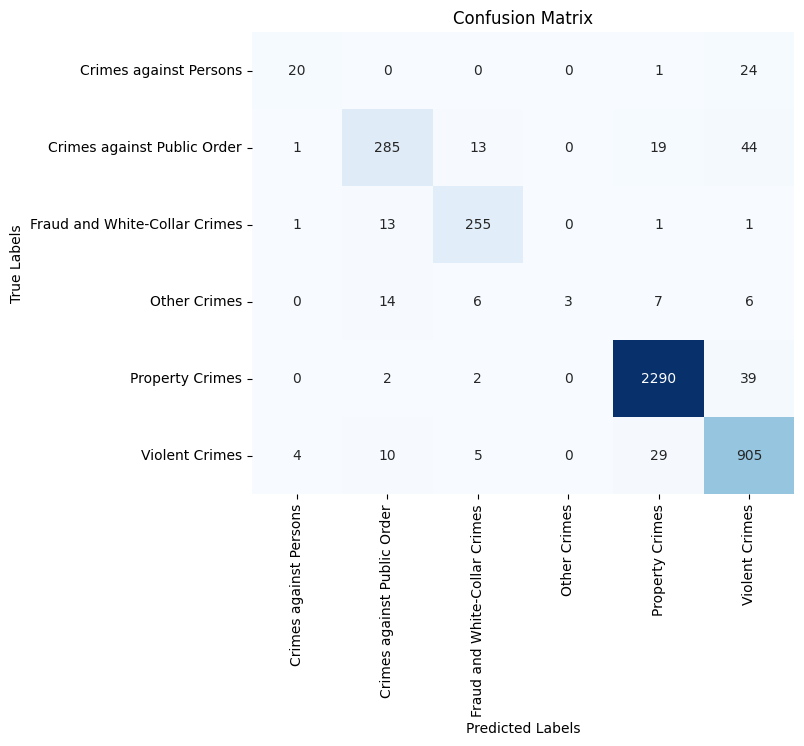

In [124]:
conf_matrix = confusion_matrix(yval_decoded, rf_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=class_names, yticklabels=class_names)
#'d' indicates that the numbers should be formatted as decimal integers.
#'cbar' this parameter disables the color bar (legend) that indicates the scale of values. Setting it to True would display the color bar next to the heatmap, showing the range of values represented by different colors.
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> Lets go on now with LGBM 
> > * LightGBM (Light Gradient Boosting Machine) is a fast, efficient, and high-performance gradient boosting framework that is widely used for machine learning tasks, especially with large datasets and complex models. 

In [125]:
yval_decoded = le.inverse_transform(yval_encoded)
ytrain_decoded = le.inverse_transform(ytrain_encoded)

In [126]:
model_lgbm = lgb.LGBMClassifier(random_state=43) 
model_lgbm.fit(xtrain_combined, ytrain_decoded)
    

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12678
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 212
[LightGBM] [Info] Start training from score -4.487387
[LightGBM] [Info] Start training from score -2.403788
[LightGBM] [Info] Start training from score -2.691931
[LightGBM] [Info] Start training from score -4.717499
[LightGBM] [Info] Start training from score -0.539032
[LightGBM] [Info] Start training from score -1.433910


LGBMClassifier(random_state=43)

In [127]:
lgbm_pred = model_lgbm.predict(xval_combined)
lgbm_accuracy = accuracy_score(yval_decoded, lgbm_pred)
lgbm_accuracy

0.9475

In [128]:
print("Classification Report:")
print(classification_report(yval_decoded, lgbm_pred))

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.62      0.58      0.60        45
  Crimes against Public Order       0.86      0.81      0.84       362
Fraud and White-Collar Crimes       0.91      0.94      0.92       271
                 Other Crimes       0.44      0.22      0.30        36
              Property Crimes       0.99      0.99      0.99      2333
               Violent Crimes       0.92      0.95      0.93       953

                     accuracy                           0.95      4000
                    macro avg       0.79      0.75      0.76      4000
                 weighted avg       0.94      0.95      0.95      4000



> > * **Insights** 
> > > * The model demonstrates high overall accuracy,This indicates that the model is performing well over different crime category.
> > > * The weighted average precision, recall, and F1-score are also high, showing that the model maintains balanced performance across classes.
> > * : With a precision and the macro average shows that the model is performing good across all categories but highlights some of the weaker performing categories like "Other Crimes" and "Crimes against Persons.

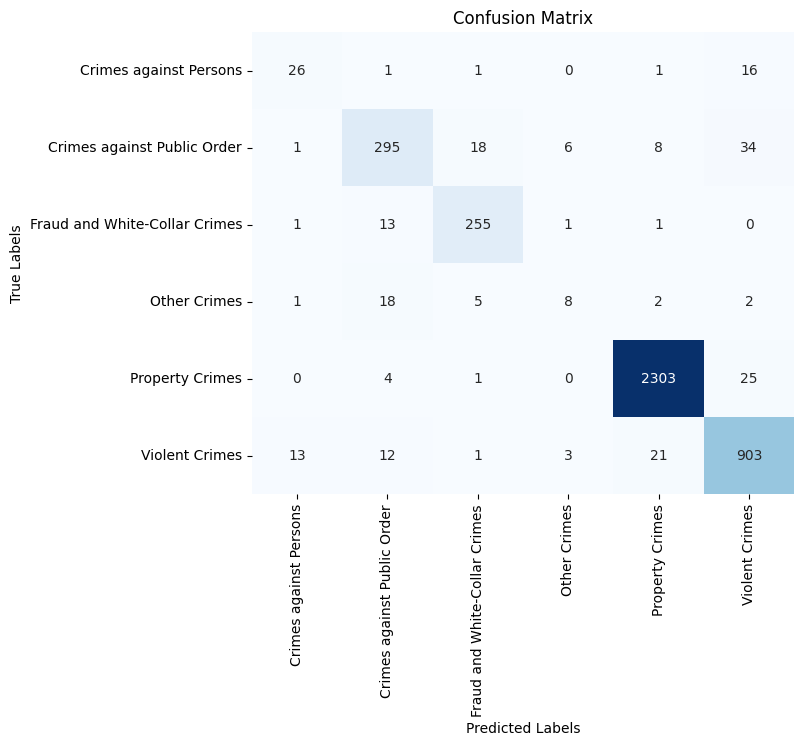

In [129]:
conf_matrix = confusion_matrix(yval_decoded, lgbm_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=class_names, yticklabels=class_names)
#'d' indicates that the numbers should be formatted as decimal integers.
#'cbar' this parameter disables the color bar (legend) that indicates the scale of values. Setting it to True would display the color bar next to the heatmap, showing the range of values represented by different colors.
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> ## Model Comparisons:
> > Here we will compare the different performace obtained from the above models that are:
Logistic, Descision Tree, Random Forest, Light Bgm.

In [130]:
model_names = ['Logistic','Descision Tree','Random Forest', 'Light BGM']
model_accuracies = [log_accuracy, dtree_accuracy, rf_accuracy, lgbm_accuracy]

for i in range (len(model_names)):
    print(model_names[i] , ' : ',model_accuracies[i])

Logistic  :  0.93275
Descision Tree  :  0.92825
Random Forest  :  0.9395
Light BGM  :  0.9475


> > Lets Visualize it for better interpretation.

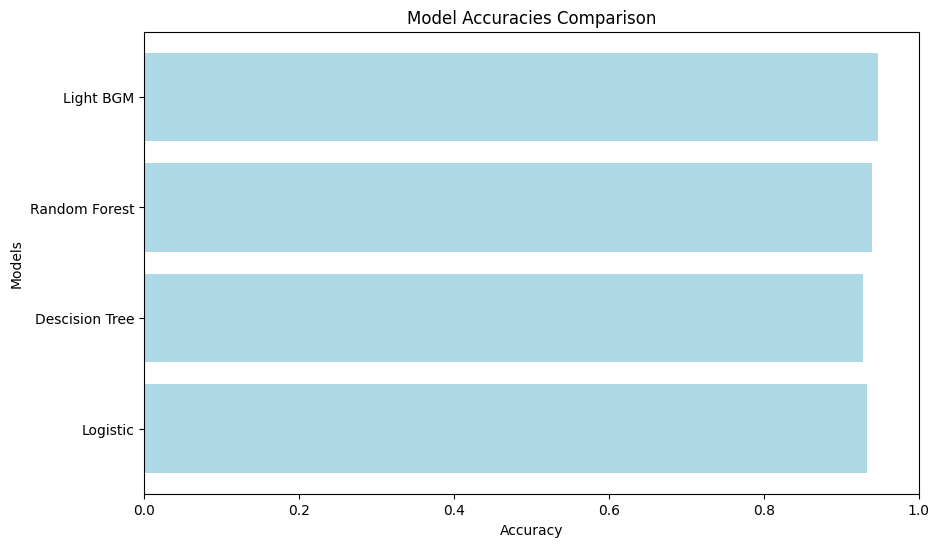

In [131]:
plt.figure(figsize=(10, 6))
plt.barh(model_names, model_accuracies, color='LightBlue')
plt.title('Model Accuracies Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0, 1)  
plt.show()


> > ### Interpretation of Model Accuracies
> > > *  Logistic Regression :  provides a strong baseline and performs quite well, showing it can effectively handle this dataset.
> > > * Descision Tree : It's accuracy is quite low as compared to logistic. It may have suffered from overfitting ect.
> > > * Random Forest : The Random Forest model shows a performance that is comparable to Logistic Regression but slightly lower.
> > > * LightGBM: It's accuracy is heighest among all, indicating its advanced boosting techniques are well-suited for this dataset.


# HyperParameter Tunnigs:

> Here we will do hyperparameter tunnings of some models with high accuracies and try to maximize their efficiencies and boost the outcomes prominently.


> > During the initial stages of feature engineering, I worked with a high-dimensional dataset containing around 4k features. However, when performing hyperparameter tuning with GridSearchCV and RandomizedSearchCV, the training process was computationally intensive and time-consuming. To address this issue, I decided to reduce the number of features further.
> > I applied additional feature selection techniques, reducing the feature set to around 1000 features. This reduction not only improved the computational efficiency but also resulted in a slight increase in the model's accuracy.
> > we will be using light BGM which was the best model from the above models.
> > * > Explicitly doing it for better rank and accuracy enhancement. Also due to Machine and time limitations.

In [132]:
selector2 = SelectKBest(score_func=f_classif, k=1000)
xtrain_selected2 = selector2.fit_transform(xtrain_combined, ytrain)
xval_selected2 = selector2.transform(xval_combined)
testdata_selected2 = selector2.transform(testdata_combined)

In [133]:
xtrain_selected2.shape

(16000, 1000)

In [134]:
yval_decoded = le.inverse_transform(yval_encoded)
ytrain_decoded = le.inverse_transform(ytrain_encoded)

In [135]:
model_lgbm2 = lgb.LGBMClassifier(random_state=42)
model_lgbm2.fit(xtrain_selected2, ytrain_decoded)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12449
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 191
[LightGBM] [Info] Start training from score -4.487387
[LightGBM] [Info] Start training from score -2.403788
[LightGBM] [Info] Start training from score -2.691931
[LightGBM] [Info] Start training from score -4.717499
[LightGBM] [Info] Start training from score -0.539032
[LightGBM] [Info] Start training from score -1.433910


LGBMClassifier(random_state=42)

In [136]:
accuracy_score(yval, model_lgbm2.predict(xval_selected2)) # More accurate.

0.94825

> > The model not only got less complex but got more accurate with this. as compared to earliear accuracy.

> Let's compare and finaalize the feature count **[ Double Check ]**

In [137]:
for k in [500,1000,1500]: 
    selector2 = SelectKBest(score_func=f_classif, k=k)
    xtrain_selected2 = selector2.fit_transform(xtrain_combined, ytrain)
    xval_selected2 = selector2.transform(xval_combined)
    testdata_selected2 = selector2.transform(testdata_combined)
    
    model_lgbm2 = lgb.LGBMClassifier(random_state=42,verbose=-1)
    model_lgbm2.fit(xtrain_selected2, ytrain_decoded)
    
    print(accuracy_score(yval, model_lgbm2.predict(xval_selected2)))


0.94775
0.94825
0.94525


> **Final prediction to choose 1000 features justified.**

> > After doing Similar Hyperparameter tunings, which are done in some other versions of the notebook, which cannot be provided here as due to the time frame and project submission and computational constants.

> > Selecting to tune up the model with the best score.


In [138]:
param_dist = {
     'num_leaves': [57,77], #Partions the descision tree further.
     'learning_rate': [0.04, 0.07], # controls how much the model's predictions are adjusted with each iteration of boosting. 
     'n_estimators': [100,300], #number of boosting rounds, or the number of trees in the model.
     'max_depth': [8],# Depth refers to the number of splits a tree can make before reaching the leaf nodes.
     'subsample': [0.98,0.9812], #This parameter controls the fraction of samples used to fit each tree.
     'colsample_bytree': [0.05,0.7], #controls the fraction of features (columns) used to build each tree. Type of regularization.
     'min_child_weight': [1, 2] #This parameter sets the minimum sum of instance weights (hessian) needed in a child (leaf). It is used to control overfitting.
                                   
}

lgbm = lgb.LGBMClassifier(verbosity=-1, random_state=42)

clf = RandomizedSearchCV(lgbm, param_dist, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)

clf.fit(xtrain_selected2, ytrain)

print("Best parameters : ", clf.best_params_)
print("Best accuracy : ", clf.best_score_)

Best parameters :  {'subsample': 0.98, 'num_leaves': 57, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.04, 'colsample_bytree': 0.7}
Best accuracy :  0.9479999136616454


In [139]:
#Best Model Obtained Evaluation after HyperParamters Tunnings.
yval_pred = clf.predict(xval_selected2)
val_accuracy = accuracy_score(yval, yval_pred)
print('Validation Accuracy:' ,val_accuracy)

Validation Accuracy: 0.949


In [140]:
clf.best_params_

{'subsample': 0.98,
 'num_leaves': 57,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.04,
 'colsample_bytree': 0.7}

> > ### Evaluating the best model after HyperParametres Tunnings

> > Let us see its classification report.

In [141]:
print("Classification Report:")
print(classification_report(yval, yval_pred))

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.61      0.62      0.62        45
  Crimes against Public Order       0.85      0.82      0.84       362
Fraud and White-Collar Crimes       0.91      0.94      0.93       271
                 Other Crimes       0.62      0.28      0.38        36
              Property Crimes       0.99      0.99      0.99      2333
               Violent Crimes       0.93      0.95      0.94       953

                     accuracy                           0.95      4000
                    macro avg       0.82      0.77      0.78      4000
                 weighted avg       0.95      0.95      0.95      4000



> > > * Final model has performed impressively well, achieving an overall accuracy of almost 95%, which is the best score among all the models we tried out previously. 
> > > > * The model excels at identifying [property crimes,Violent Crimes and Fraud and White-Collar Crimes ] with near-perfect precision and recall. 
> > > > *  The model has good performance in Crimes against Public Order, though not as strong as in the previous categories. The recall is slightly lower, suggesting that some instances of crimes against public order may be missed.
> > > > *  Crimes against Persons has lower precision and recall compared to others, which could be due to the smaller number of cases (support) or greater complexity in distinguishing these crimes.
> > > > *  The performance for other crimes is the weakest, with a particularly low recall. This suggests that the model struggles to detect these crimes, likely due to the small number of cases. 

# Justification for Choosing the Final Model
> > After evaluating multiple models,we got Superior Performance Across Key Metrics with the heighest accuracy after fine tunning this model therefore we took the decision to select this LightGBM model as the final model.

> > Let us finally visualize it and move ahead for the submission.

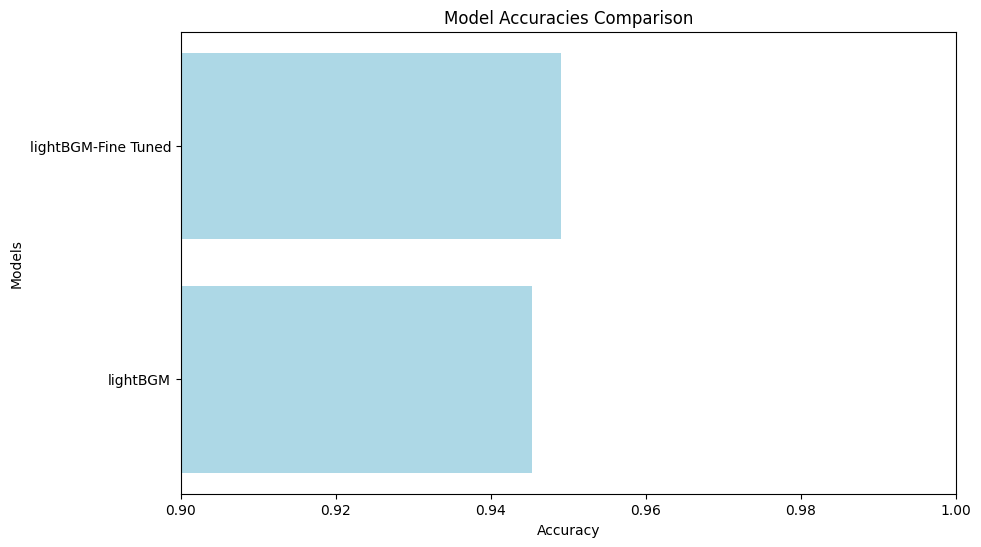

In [142]:
names = ['lightBGM', 'lightBGM-Fine Tuned']
accuracies = [accuracy_score(yval, model_lgbm2.predict(xval_selected2)),val_accuracy]
plt.figure(figsize=(10, 6))
plt.barh(names, accuracies, color='LightBlue')
plt.title('Model Accuracies Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0.9,1)
plt.show()

In [143]:
ytestf_pred = clf.predict(testdata_selected2)

In [144]:
submission = pd.DataFrame({
    'ID': np.arange(1, 5001),
    'Crime_Category': ytestf_pred
})

In [145]:
submission.to_csv('submission.csv',index=False)

# Thank You.